[//]: #![erdos-logo](risecamp/erdos-pylot-risecamp-logo.png)
<img src="risecamp/erdos-pylot-risecamp-logo.png" alt="erdos-logo" style="width: 800px;"/>

<font color="red"><b>TODO</b></font>: Give an intro of what ERDOS and Pylot is.

# Architecture of an Autonomous Vehicle

[//]: #![Pylotpipeline](./doc/source/images/pylot.png)
<img src="doc/source/images/pylot.png" alt="Pylot Pipeline" style="width: 800px;"/>

An autonomous vehicle (AV) is typically equipped with multiple instances of sensor including cameras and LiDARs that operate at different frequencies and generate approximately 1GB/s of data.

A state-of-the-art AV pipeline comprises of five modules, each implemented using several components:
1. __Perception__: Recognizes the scene by detecting and classifying objects.
2. __Localization__: Provides the location of the vehicle with decimeter-level accuracy.
3. __Prediction__: Estimates how other agents would move in the environment.
4. __Planning__: Generates trajectories for the AV to follow.
5. __Control__: Physically operates the AV.


## Tutorial Overview

<img src="risecamp/scenario.png" alt="risecamp-scenario" style="width: 800px;"/>

In this set of tutorials, we will focus on the __*planning*__ module of the vehicle to show how changes in the driving environment require the AV to utilize different hyperparameters to ensure safety.

[Exercise 1](#exercise1) walks through the development of the __*planning*__ component, and executes it at a fixed speed in an emergency scenario.

[Exercise 2](#exercise2) utilizes the planning component developed in [Exercise 1](#exercise1) to drive at different speeds and see when the configuration becomes unsafe.

[Exercise 3](#exercise3) shows how tweaking the hyperparameters of the planning component can help the vehicle ensure safety at different speeds.

<a id='exercise1'></a>
# Exercise 1: Getting started with Pylot!
![perception](risecamp/perception-crop.gif)

__GOAL__: This exercise walks through the development of a __*planning*__ component, and its execution inside the [Pylot](https://github.com/erdos-project/pylot) pipeline at a fixed speed.

ERDOS models the AV pipeline as a directed dataflow graph where developers implement the components of the pipeline as __*operators*__ that communicate with each other through typed __*streams*__. Operators can request callbacks upon receipt of messages on a stream, and send the computed results to other operators via a different stream. For example, a __*planning*__ component computes the trajectory of the AV based on the predictions sent by the __*prediction*__ module, and sends it to the __*control*__ module to physically operate the AV.

The following cell provides a skeleton implementation of a `PlanningOperator` that receives a `message` from the `PredictionOperator`. Upon receipt of the message, the `on_prediction_update` method is invoked which retrieves the predictions from the message for the planning algorithm to use. However, the initial implementation returns an empty list from the predictions, which tells the planner that there are no obstacles to plan around. 

We will now fix this implementation of the `Planner` by correctly using the received predictions. To achieve this, you have to complete the following tasks:
1. Run the following two cells *without changing the code* to visualize the effects of no predictions on the AV.
2. Instead of returning the empty list, return the correct predictions by retrieving them from the `message` using `message.predictions`. 
3. Run the following two cells again with your fixed code to see how the AV drives! 

In [9]:
from pylot.planning.planning_operator import PlanningOperator

# TODO(1): Run this cell and the next one without any changes to the code 
#          to see the effect of no predictions on on the planner.

class Planner(PlanningOperator):
    def on_prediction_update(self, message):
        # TODO: Instead of the empty list, return `message.predictions`.
        return message.predictions

    
# Run the simulator and the scenario (Don't change!)
import pylot.risecamp 
simulator = pylot.risecamp.start_simulator()
scenario = pylot.risecamp.setup_scenario()

Starting the simulator...
Finished running the simulator...
Setting up the scenario... /home/erdos/workspace/pylot
Finished setting up the scenario...


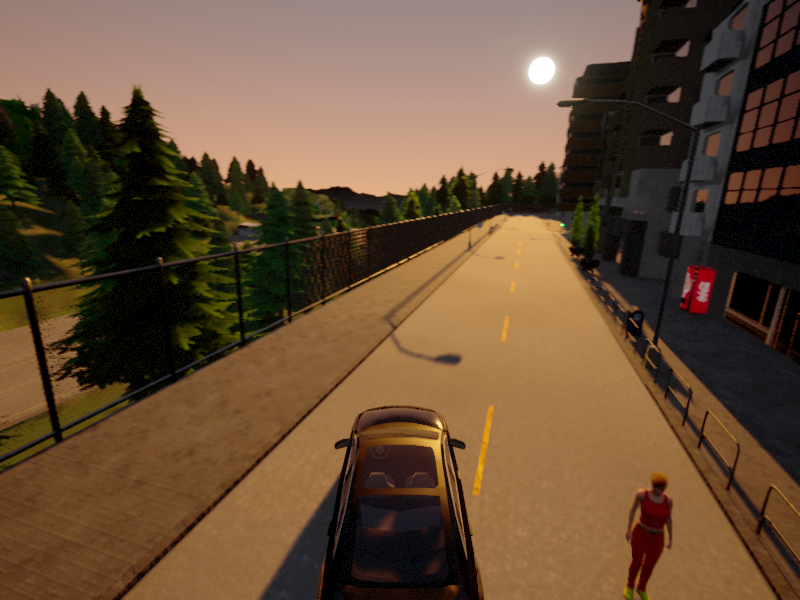

In [10]:
# Helper function to start the Pylot pipeline.
pylot.risecamp.start_pylot(planner=Planner)

# Functions to reset the scenario and the simulator. (Don't change!)
simulator.reset()
scenario.reset()

<a id='exercise2'></a>
# Exercise 2: Experimenting with vehicle speed

__GOAL__: Show the effect of a static `Planner` configuration on the AV at different driving speeds.

The previous exercise constructed a `Planner` that was able to prevent a collision with the pedestrian at a speed of 12m/s. However, the speed at which the vehicle is driving requires the vehicle to have different response times in order to remain safe. 

For example, the image below shows that a vehicle driving at 15m/s is able to stop for the pedestrian with a response time of 400ms. However, the same vehicle requires a 200ms response time to be able to prevent a collision at 18m/s.

<img src="risecamp/Stopping-distance.png" alt="Stopping Distance" style="width: 800px;"/>

We will now explore the effects of different driving speeds of the AV on its ability to prevent a collision under a static configuration. To achieve this, complete the following tasks:
1. Change the `VEHICLE_SPEED` to a desired speed.
2. Run the following two cells to see the effect of the vehicle speed on its ability to prevent a collision with a static configuration.

In [11]:
# TODO: Change the vehicle speed here to see the effect. (Try 15m/s!)
VEHICLE_SPEED = 15 # m/s 

# Run the simulator and the scenario (Don't change!)
import pylot.risecamp 
simulator = pylot.risecamp.start_simulator()
scenario = pylot.risecamp.setup_scenario()

Starting the simulator...
Finished running the simulator...
Setting up the scenario... /home/erdos/workspace/pylot
Finished setting up the scenario...


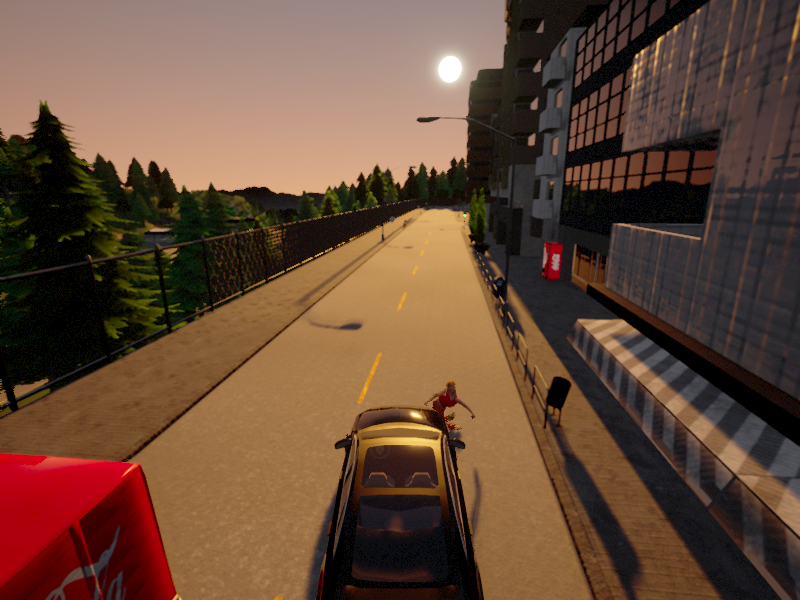

In [12]:
# Helper function to start the Pylot pipeline.
pylot.risecamp.start_pylot(vehicle_speed=15)

# Functions to reset the scenario and the simulator. (Don't change!)
simulator.reset()
scenario.reset()

# Exercise 3: Experimenting with different configurations

__GOAL__: Explore different configurations of the `Planner` to prevent a collision at different driving speeds.

[Exercise 2](#exercise_2) showed us that a static configuration of the hyperparameters of our `Planner` does not allow the AV to ensure safety across various driving speeds. 

[ERDOS](https://github.com/erdos-project/erdos) enables an AV pipeline such as [Pylot](https://github.com/erdos-project/pylot) to adjust the runtime of each component in order to ensure the best accuracy for a given environment. For example, the pipeline might choose to run a faster object-detection model that has a lower accuracy in order to allocate more time to the planning module in order to ensure safety.

We will now explore the effects of the following two hyperparameters on the ability of our `Planner` to prevent a collision:
1. __*Road Width*__: <font color="red"><b>TODO</b></font>: Explain.
2. __*Time Discretization*__: <font color="red"><b>TODO</b></font>: Explain.

In [ ]:
# TODO: Change the time discretization, and road width parameters.
ROAD_WIDTH = 0.2
TIME_DISCRETIZATION = 0.2
VEHICLE_SPEED = 12

# Run the simulator and the scenario (Don't change!)
import pylot.risecamp 
simulator = pylot.risecamp.start_simulator()
scenario = pylot.risecamp.setup_scenario()

In [ ]:
# Helper function to start the Pylot pipeline.
pylot.risecamp.start_pylot(vehicle_speed=vehicle_speed,
                           time_discretization=TIME_DISCRETIZATION, 
                           road_width=ROAD_WIDTH)

# Functions to reset the scenario and the simulator. (Don't change!)
simulator.reset()
scenario.reset()